###ARCHITECTURE OF A CNN
- INPUT IMAGE - Target images we'd like to discover patterns in.
- INPUT LAYER - Takes in target images and pre-processes them for further layers
- CONVOLUTION LAYER - Extracts/learns the most important features from target images
- HIDDEN ACTIVATION - Add non-linearity to learned features(non-straight lines)
- POOLING LAYER - reduces the dimensionality of learned images features
- FULLY CONNECTED LAYER - Further refines learned features from Convolutional layers.
- OUTPUT LAYER - Takes learned features and outputs them in shape of target labels
- OUTPUT ACTIVATION - Add non-linearities to output layer.


###Get Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-06 07:48:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.0MB/s    in 5.6s    

2023-07-06 07:48:15 (18.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



###Inspect the DATA

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

#walk through the pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize the images, first get the class names programmatically

In [ ]:
#Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #create a list of class names from the sub directories
print(class_names)

['pizza' 'steak']


In [ ]:
#visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir,target_class):
  #setup the target directory
  target_folder = target_dir + target_class
  #Get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  #read in  the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")#show the shape of the image

  return img

Image shape: (512, 512, 3)


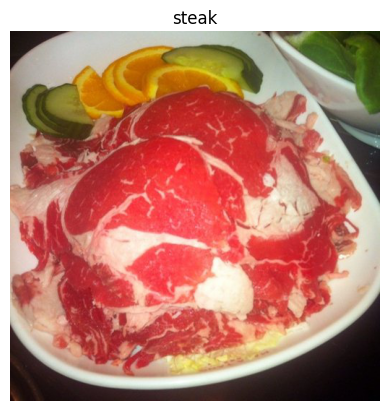

In [ ]:
#view a random image from the training dataset
img=view_random_image(target_dir = "pizza_steak/train/",
                      target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[19, 11,  9],
        [21, 13, 11],
        [22, 14, 12],
        ...,
        [19, 36,  2],
        [19, 36,  2],
        [21, 38,  2]],

       [[20, 12, 10],
        [22, 14, 12],
        [23, 15, 13],
        ...,
        [19, 36,  2],
        [18, 35,  1],
        [19, 36,  2]],

       [[21, 13, 11],
        [22, 14, 12],
        [24, 16, 14],
        ...,
        [20, 35,  2],
        [19, 34,  1],
        [19, 34,  1]],

       ...,

       [[29, 10, 12],
        [31, 11, 12],
        [34, 10,  8],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[27, 11, 14],
        [29, 11, 11],
        [32, 11, 10],
        ...,
        [ 2,  2,  4],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[25, 10, 13],
        [26, 10, 11],
        [32, 11, 10],
        ...,
        [ 2,  1,  6],
        [ 1,  0,  5],
        [ 1,  0,  5]]], dtype=uint8)>

In [ ]:
#view the image shape
img.shape #returns width,height and color channels(REd,blue,green)

(512, 512, 3)

In [ ]:
#get all the pixel values between 0 and 1
img/225

array([[[0.08444444, 0.04888889, 0.04      ],
        [0.09333333, 0.05777778, 0.04888889],
        [0.09777778, 0.06222222, 0.05333333],
        ...,
        [0.08444444, 0.16      , 0.00888889],
        [0.08444444, 0.16      , 0.00888889],
        [0.09333333, 0.16888889, 0.00888889]],

       [[0.08888889, 0.05333333, 0.04444444],
        [0.09777778, 0.06222222, 0.05333333],
        [0.10222222, 0.06666667, 0.05777778],
        ...,
        [0.08444444, 0.16      , 0.00888889],
        [0.08      , 0.15555556, 0.00444444],
        [0.08444444, 0.16      , 0.00888889]],

       [[0.09333333, 0.05777778, 0.04888889],
        [0.09777778, 0.06222222, 0.05333333],
        [0.10666667, 0.07111111, 0.06222222],
        ...,
        [0.08888889, 0.15555556, 0.00888889],
        [0.08444444, 0.15111111, 0.00444444],
        [0.08444444, 0.15111111, 0.00444444]],

       ...,

       [[0.12888889, 0.04444444, 0.05333333],
        [0.13777778, 0.04888889, 0.05333333],
        [0.15111111, 0

###An end to end example

Building a convolutional network to find the patterns in the images, more specifically

- load the images
- preprocess our images
- build a cnn to find patterns in our images
- compile our cnn
- fit the cnn to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(filters=10,
                                     kernel_size = 3,
                                     activation="relu",
                                     input_shape=(224,224,3)),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.MaxPool2D(pool_size=2,
                                        padding="valid"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.Conv2D(10, 3, activation="relu"),
              tf.keras.layers.MaxPool2D(2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(1,activation="sigmoid")
    ])

#compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

FileNotFoundError: ignored

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 227ms/step - loss: 1.1888 - accuracy: 0.6793 - val_loss: 0.5078 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.5260 - accuracy: 0.7687 - val_loss: 0.5087 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 12s 262ms/step - loss: 0.5452 - accuracy: 0.7600 - val_loss: 0.6271 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.5437 - accuracy: 0.7573 - val_loss: 0.6099 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4898 - accuracy: 0.7813 - val_loss: 0.4843 - val_accuracy: 0.7700


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 209ms/step - loss: 2.4733 - accuracy: 0.6220 - val_loss: 0.8725 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.7499 - accuracy: 0.7000 - val_loss: 0.7998 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 10s 224ms/step - loss: 0.6668 - accuracy: 0.7007 - val_loss: 0.4819 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.5103 - accuracy: 0.7607 - val_loss: 0.6708 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.5913 - accuracy: 0.7347 - val_loss: 0.5256 - val_accuracy: 0.7540


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


###1. Become one with DATA

Image shape: (384, 512, 3)
Image shape: (512, 384, 3)


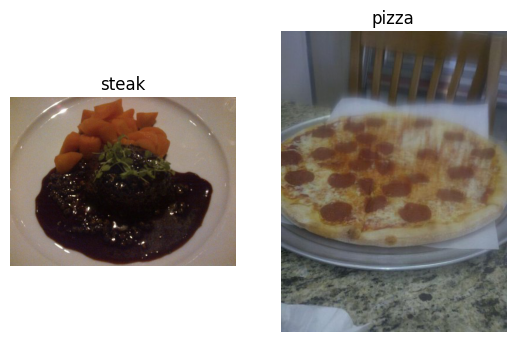

In [ ]:
#visualize the data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

###2. Pre-Process the data(prepare it for the model)

In [ ]:
 #define the directory dataset paths
 train_dir = "pizza_steak/train/"
 test_dir = "pizza_steak/test/"

The next step is to turn the data into **batches**.
A batch is a small subset of data. Rather than look at all -10,000 images at one time, a model might only look at 32 at a time.
It does this for a couple of reasons:
  1. 10,000 images(or more) might not fit into the memory of your processor(GPU)
  2. Trying to learn the patterns in 10,000 in one hot could result in the model not being able to learn very well

In [ ]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of images
                                               target_size=(224,224), #target size of images(height,width)
                                               class_mode="binary", #type of data you're working with
                                               batch_size=32) #size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get the sample of the train data batch
images, labels = train_data.next() #get the "next" batch of images/labels in train_data
len(images),len(labels)

(32, 32)

In [ ]:
#How many batches are there?
len(train_data)

47

In [ ]:
#Get the first two images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
#view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

###3. Create a CNN model

A baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and thewn as you keep experimenting you try to beat the baseline

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10, #filter is the number of sliding windows going across an input (higher = more complex model)
            kernel_size=3, #the size of the sliding window going across an input
            strides=1, #the size of the step the sliding window takes across an inout
            padding="valid", #the "same", output shape is same as inout shape, if "valid", output shape gets compresses
            activation="relu",
            input_shape=(224,224,3)), #input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #output layer (working with binary classification so only one ouput neuron)
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4. Fit the model

In [ ]:
#check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
#Fit the model
history_4 = model_4.fit(train_data, #this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 250ms/step - loss: 0.6741 - accuracy: 0.7233 - val_loss: 0.3826 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4469 - accuracy: 0.8007 - val_loss: 0.4266 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3359 - accuracy: 0.8620 - val_loss: 0.3789 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.2123 - accuracy: 0.9300 - val_loss: 0.3537 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 13s 275ms/step - loss: 0.0878 - accuracy: 0.9800 - val_loss: 0.3873 - val_accuracy: 0.8460


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 208ms/step - loss: 0.3325 - accuracy: 0.8540


[0.33251744508743286, 0.8539999723434448]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

###5. Evaluating the module

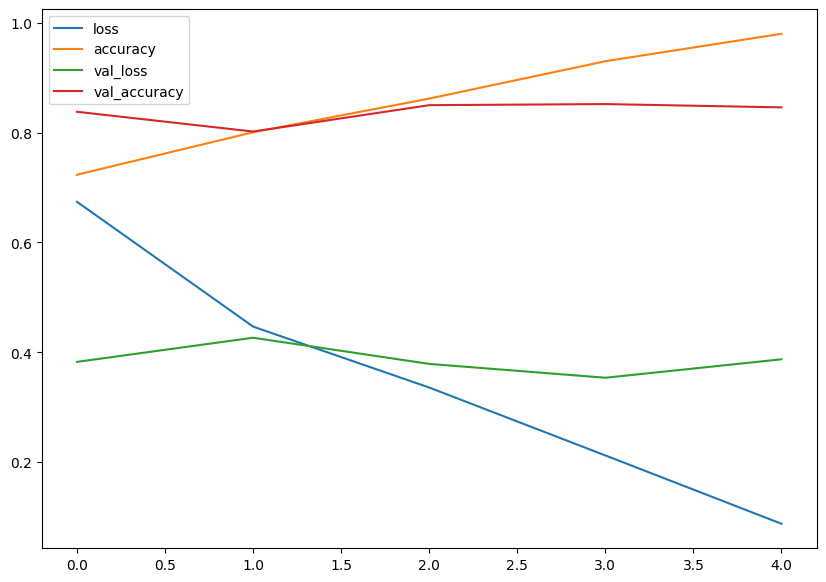

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
#plot the validatioon and training curves separetely

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

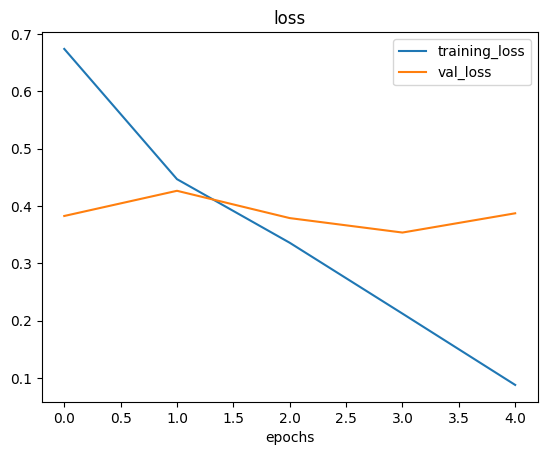

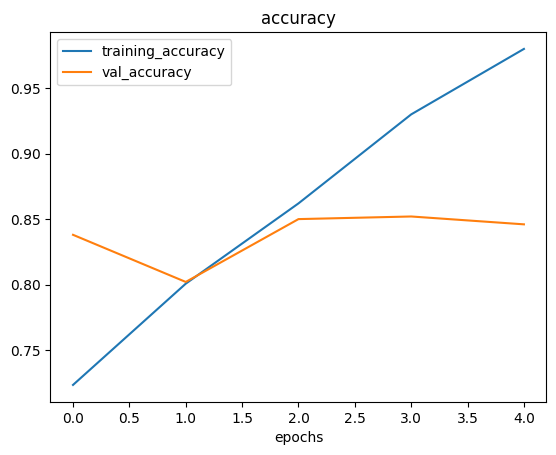

In [ ]:
#checkout the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:**When a model's **validation loss starts to increase** its likely that the model is **overfitting** the training data set

###6. Adjust the model parameters
- Fitting a Machine Learning model comes in 3 steps:
  - create a baseline
  - Beat the baseline by overfitting a larger model
  - Reduce overfitting

Ways to Induce Overfitting:
  - Increase the no of conv layers
  - Increase no of conv filters
  - Add another Dense layer to the output of our flattened layer

Reduce Overfitting:
  - Add data augmentation
  - Add regularization layers(such as MaxPool2D)
  - Add more data

Reducing overfitting is also called **Regularization**

In [ ]:
#create a model (new baseline model)

model_5 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 243ms/step - loss: 0.6500 - accuracy: 0.6187 - val_loss: 0.5218 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4724 - accuracy: 0.7827 - val_loss: 0.3962 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4174 - accuracy: 0.8213 - val_loss: 0.3734 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4027 - accuracy: 0.8173 - val_loss: 0.3836 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3707 - accuracy: 0.8387 - val_loss: 0.3447 - val_accuracy: 0.8580


In [ ]:
#Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

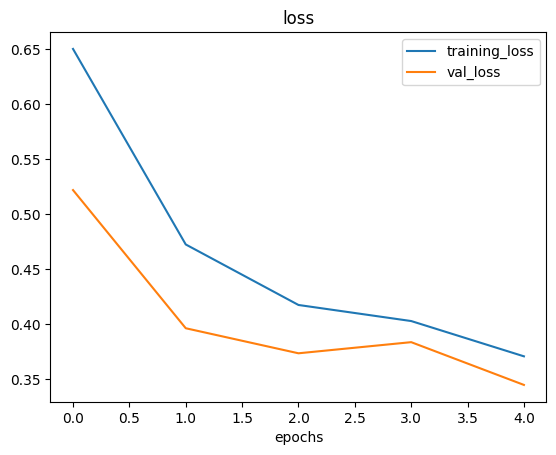

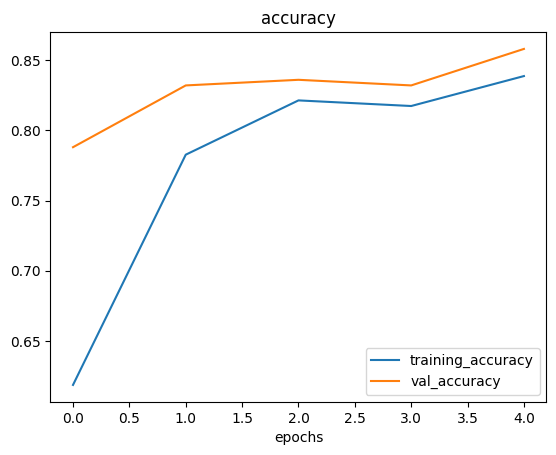

In [ ]:
#Plot the curves
plot_loss_curves(history_5)

###Finding data Augmentation

In [ ]:
#create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Data Augmentation is the process of altering the training data, leading it to have more diversity and in turn allowing the modeks to learn more generalizable(hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

###Visualizing Augmented Data

In [ ]:
#import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size=32,
                                                                   class_mode = "binary",
                                                                   shuffle=False)

print("Non-Augmented Training Data")
#create non_augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE=(224,224)
#create non_augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


In [ ]:
#Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 4


(-0.5, 223.5, 223.5, -0.5)

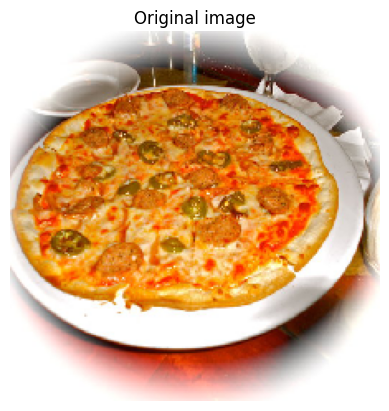

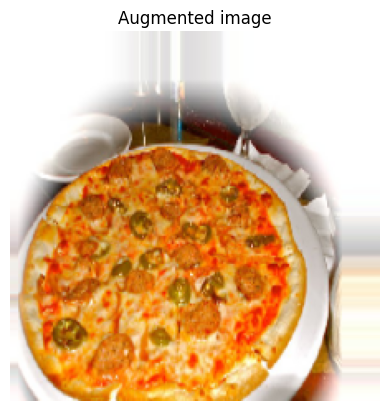

In [ ]:
#Show original image and augmented image
import random
random_number = random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Create a model to see how well it learnt Augmented data

In [ ]:
#create a mode
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 573ms/step - loss: 0.7702 - accuracy: 0.6000 - val_loss: 0.7558 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 543ms/step - loss: 0.7431 - accuracy: 0.4140 - val_loss: 0.6757 - val_accuracy: 0.5080
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6801 - accuracy: 0.5307 - val_loss: 0.6634 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 28s 591ms/step - loss: 0.6798 - accuracy: 0.5253 - val_loss: 0.6538 - val_accuracy: 0.5280
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6649 - accuracy: 0.5567 - val_loss: 0.6395 - val_accuracy: 0.5800


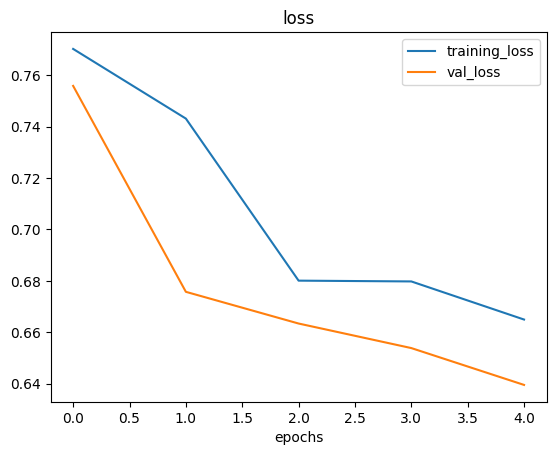

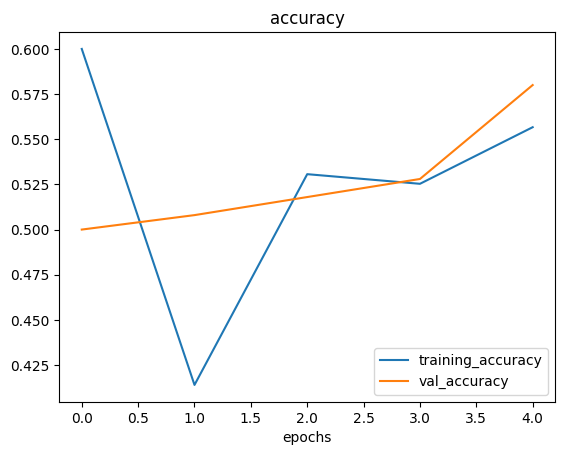

In [ ]:
#check out the models training curves
plot_loss_curves(history_6)

Lets shuffle the augmented training data and train another model(the same as before) on it and see what happens

In [ ]:
#import data and augment it and shuffle from training data
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) #shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
#create the model
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 569ms/step - loss: 0.6845 - accuracy: 0.5340 - val_loss: 0.6116 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 26s 544ms/step - loss: 0.5706 - accuracy: 0.7187 - val_loss: 0.3834 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5286 - accuracy: 0.7433 - val_loss: 0.3635 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 25s 540ms/step - loss: 0.4819 - accuracy: 0.7787 - val_loss: 0.3471 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 25s 542ms/step - loss: 0.4758 - accuracy: 0.7967 - val_loss: 0.3214 - val_accuracy: 0.8660


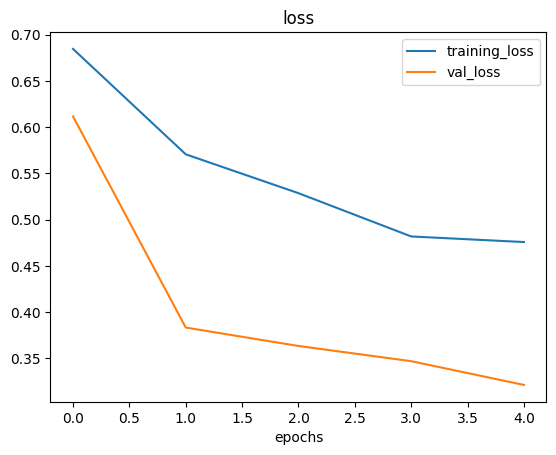

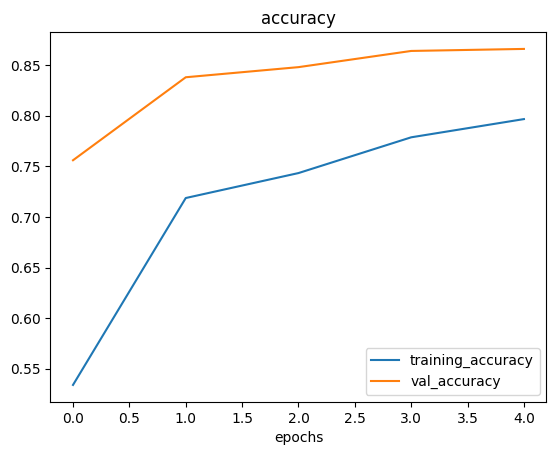

In [ ]:
#Plot loss curves
plot_loss_curves(history_7)

###Making a prediction with our trained model on our own custom data

In [ ]:
import tensorflow as tf
#create a function to import image and resize it to be able to be used with the model
def load_and_prep_image(filename, img_shape=224):
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image and get all the values between 0 and 1
  img=img/255.
  return img

In [ ]:
#Load in and pre-process our custom image
steak = load_and_prep_image("/content/justus-menke-62XLglIrTJc-unsplash.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.08296596, 0.04375027, 0.0398287 ],
        [0.09933391, 0.06011823, 0.05619666],
        [0.07259142, 0.03337573, 0.02945416],
        ...,
        [0.04705882, 0.02352941, 0.02352941],
        [0.04644608, 0.02291667, 0.02291667],
        [0.04595588, 0.02242647, 0.02242647]],

       [[0.07320554, 0.03398985, 0.03006828],
        [0.07704833, 0.03783264, 0.03391107],
        [0.08451505, 0.04529937, 0.0413778 ],
        ...,
        [0.05412755, 0.03059814, 0.03059814],
        [0.05367647, 0.03014706, 0.03014706],
        [0.04517764, 0.02164823, 0.02164823]],

       [[0.08541803, 0.04620235, 0.04228078],
        [0.08615606, 0.04694037, 0.0430188 ],
        [0.08744252, 0.04822684, 0.04430527],
        ...,
        [0.05432039, 0.01902627, 0.02294784],
        [0.05403535, 0.01874123, 0.0226628 ],
        [0.04595588, 0.02242647, 0.02242647]],

       ...,

       [[0.1757013 , 0.13256405, 0.00831801],
        [0.17

In [ ]:
pred=model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 184ms/step


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  #Import the target image and pre process it
  img = load_and_prep_image(filename)
  #Make predictions
  pred = model.predict(tf.expand_dims(img, axis=0))
  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  #Plot the image and predict class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


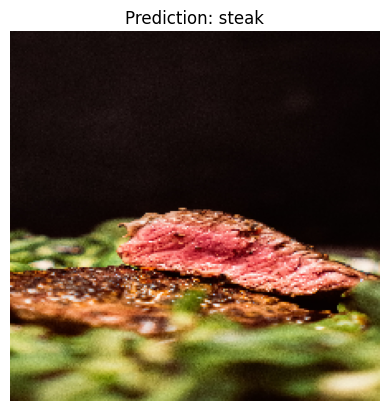

In [ ]:
#Test our model on a custom image
pred_and_plot(model_7, "/content/justus-menke-62XLglIrTJc-unsplash.jpg")

###Multi-class Image classification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-06-26 23:47:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.3MB/s    in 24s     

2023-06-26 23:48:11 (20.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


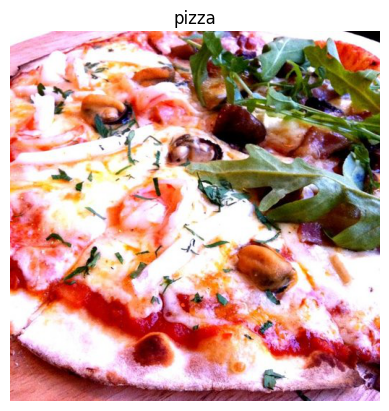

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

###Pre-process the DATA

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###Create a Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#The model is built with having the reference of the layers in the CNN explainer website
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

###Fit the model

In [ ]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 265ms/step - loss: 2.2095 - accuracy: 0.1655 - val_loss: 2.1194 - val_accuracy: 0.2176
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 2.0448 - accuracy: 0.2581 - val_loss: 1.9994 - val_accuracy: 0.2936
Epoch 3/5
235/235 [==============================] - 54s 231ms/step - loss: 1.6616 - accuracy: 0.4347 - val_loss: 1.9422 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 54s 229ms/step - loss: 0.9606 - accuracy: 0.6816 - val_loss: 2.4269 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 54s 231ms/step - loss: 0.3554 - accuracy: 0.8907 - val_loss: 3.6602 - val_accuracy: 0.2584


###Evaluate the model

In [ ]:
#Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 24s 304ms/step - loss: 3.6602 - accuracy: 0.2584


[3.660163640975952, 0.25839999318122864]

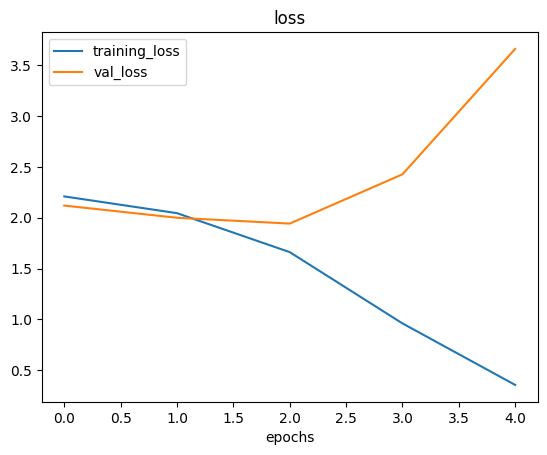

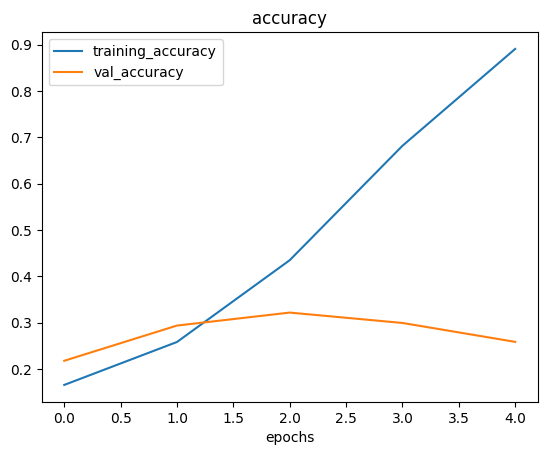

In [ ]:
plot_loss_curves(history_8)

###Adjust the model's hyperparameters

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
#Lets try removing 2 conv layers
model_9=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 266ms/step - loss: 2.1389 - accuracy: 0.2297 - val_loss: 1.9145 - val_accuracy: 0.3416
Epoch 2/5
235/235 [==============================] - 52s 220ms/step - loss: 1.7771 - accuracy: 0.3873 - val_loss: 1.8931 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 52s 219ms/step - loss: 1.5074 - accuracy: 0.5012 - val_loss: 1.8768 - val_accuracy: 0.3544
Epoch 4/5
235/235 [==============================] - 53s 225ms/step - loss: 1.1233 - accuracy: 0.6408 - val_loss: 2.0099 - val_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 0.6919 - accuracy: 0.7923 - val_loss: 2.3411 - val_accuracy: 0.3376


In [ ]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, None)              0         
                                                                 
 dense_14 (Dense)            (None, 10)               

###Try reducing Overfitting using Data Augmentation

In [ ]:
#Create a augmentated data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_10=tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
history_10=model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 550ms/step - loss: 2.2064 - accuracy: 0.1752 - val_loss: 2.1100 - val_accuracy: 0.2360
Epoch 2/5
235/235 [==============================] - 157s 668ms/step - loss: 2.1022 - accuracy: 0.2395 - val_loss: 1.9586 - val_accuracy: 0.3044
Epoch 3/5
235/235 [==============================] - 137s 584ms/step - loss: 2.0320 - accuracy: 0.2767 - val_loss: 1.8790 - val_accuracy: 0.3456
Epoch 4/5
235/235 [==============================] - 129s 547ms/step - loss: 1.9672 - accuracy: 0.3137 - val_loss: 1.8088 - val_accuracy: 0.3676
Epoch 5/5
235/235 [==============================] - 148s 632ms/step - loss: 1.9459 - accuracy: 0.3219 - val_loss: 1.7998 - val_accuracy: 0.3612


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 169ms/step - loss: 3.6602 - accuracy: 0.2584


[3.660163164138794, 0.25839999318122864]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 14s 178ms/step - loss: 1.7998 - accuracy: 0.3612


[1.7997692823410034, 0.3612000048160553]

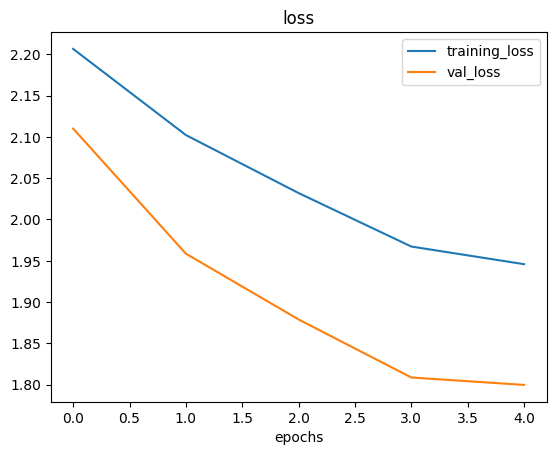

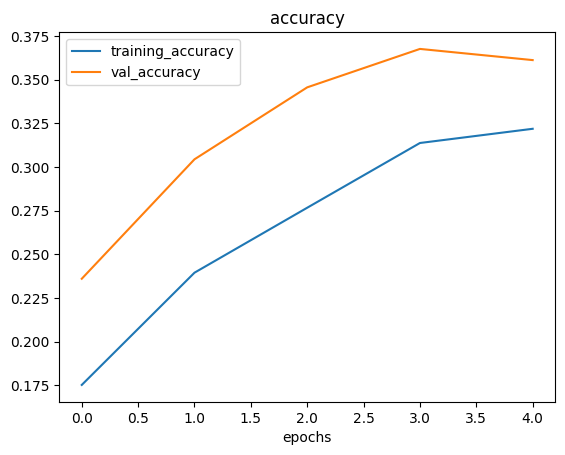

In [ ]:
#check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

###Saving and loading the model

In [ ]:
model_10.save("Saved_trained_model")

In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

OSError: ignored